In [1]:
import numpy as np

In [3]:
x_cons_data= np.load('../high_psi dataset/x_cons_data.npy')
hx_five_data= np.load('../high_psi dataset/x_five_data.npy')
lx_five_data= np.load('../low_psi_data/x_five_data.npy')

In [4]:
x_cons_data.shape,hx_five_data.shape,lx_five_data.shape

((39128, 283, 5), (1568, 283, 5), (602, 283, 5))

In [5]:
x_cons_data.shape[0],lx_five_data.shape[0]+hx_five_data.shape[0]

(39128, 2170)

In [6]:
def cross_split(x_cons_data,hx_three_data,lx_three_data,s):
    
    a=int(x_cons_data.shape[0]/10)
    b=int(hx_three_data.shape[0]/10)
    c=int(lx_three_data.shape[0]/10)
    
    #9 folds for training
    train=x_cons_data[:a*s]
    train=np.concatenate((train,x_cons_data[a*(s+1):]),axis=0)

    d=int((9*a)/(9*(b+c)))
    print(d)
    for i in range (d):
        train=np.concatenate((train,hx_three_data[:b*s]),axis=0)
        train=np.concatenate((train,hx_three_data[b*(s+1):]),axis=0)
    
        train=np.concatenate((train,lx_three_data[:c*s]),axis=0)
        train=np.concatenate((train,lx_three_data[c*(s+1):]),axis=0)
      
    np.random.shuffle(train)
    np.random.shuffle(train)
    
    # 1 fold for testing
    
    htest=np.concatenate((hx_three_data[b*s:b*(s+1)],x_cons_data[a*s:a*(s+1)]),axis=0)
    lt=   np.concatenate((lx_three_data[c*s:c*(s+1)],x_cons_data[a*s:a*(s+1)]),axis=0)

    test=htest
    test=np.concatenate((test,lx_three_data[c*s:c*(s+1)]),axis=0)
    
    
    return train,test,htest,lt


In [7]:
l=141

In [8]:
train,test,htest,ltest=cross_split(x_cons_data[:22700],hx_five_data,lx_five_data,9)

y_train=train[:,l-1,0]
y_test=test[:,l-1,0]
hy_test=htest[:,l-1,0]
ly_test=ltest[:,l-1,0]

train.shape,test.shape,htest.shape

10


((39970, 283, 5), (2486, 283, 5), (2426, 283, 5))

In [9]:
def evaluate_AUC():
    ypreds=model.predict([htest[:,l:(l*2)-1,:4],htest[:,-1,0:3]])
    fpr, tpr, thresholds = roc_curve(hy_test, ypreds)
    roc_auc = auc(fpr, tpr)
    
    ypreds2=model.predict([test[:,l:(l*2)-1,:4],test[:,-1,0:3]])
    fpr2, tpr2, thresholds2 = roc_curve(y_test, ypreds2)
    roc_auc2 = auc(fpr2, tpr2)
    
    ypreds3=model.predict([ltest[:,l:(l*2)-1,:4],ltest[:,-1,0:3]])
    fpr3, tpr3, thresholds3 = roc_curve(ly_test, ypreds3)
    roc_auc3 = auc(fpr3, tpr3)
    

    lw=2
    
    
    
    f=plt.figure()
    plt.plot(fpr2, tpr2, color='orange', lw=1, label=    'All ALT5 events (AUC= %0.2f)' % roc_auc2)
    
    plt.plot(fpr, tpr, color='red', lw=1,          label='HEvents ALT5 subset (AUC= %0.2f)' % roc_auc)
    
    plt.plot(fpr3, tpr3, color='navy', lw=1,       label='MREvents ALT5 subset (AUC= %0.2f)' % roc_auc3)

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    #f.savefig("plots/5.pdf", bbox_inches='tight')

    plt.show()


    return

In [11]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [12]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.optimizers import SGD
from keras.layers.wrappers import Bidirectional, TimeDistributed
from keras import regularizers
from keras import optimizers
from keras.layers import Input, BatchNormalization
from keras.models import Model
from sklearn import metrics
import tensorflow as tf
from tensorflow.contrib.keras import layers

Using TensorFlow backend.


In [13]:
from keras import regularizers

In [14]:
from keras import regularizers
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from keras import initializers
from keras.layers import Activation, Dense, Add

In [15]:
aucc=np.zeros((10,3))

In [16]:
inputs1 = Input(shape=(l-1, 4))
inputs3 = Input(shape=(3,))


x=Conv1D(nb_filter=32,activation='relu',filter_length=7,strides=1,kernel_initializer=initializers.random_uniform(),padding="same") (inputs1)
x=Dropout(0.2)(x)
x=MaxPooling1D(pool_length=2, stride=2)(x)

x=Conv1D(nb_filter=8,filter_length=4,strides=1,kernel_initializer=initializers.random_uniform()) (x)
x=Dropout(0.2)(x)
x=Activation('relu')(x)
x=MaxPooling1D(pool_length=2, stride=2)(x)


x=Conv1D(nb_filter=8,filter_length=3,strides=1,kernel_initializer=initializers.random_uniform()) (x)
x=Dropout(0.2)(x)
x=Activation('relu')(x)
x=MaxPooling1D(pool_length=2, stride=2)(x)







x2=Flatten()(x)


x2=keras.layers.concatenate([x2,inputs3],axis=1)





x3=Dense(32, activation='relu',)(x2)
x3=Dropout(0.5)(x3)


x3=Dense(1, activation='sigmoid',  )(x3)


model = Model(inputs=[inputs1,inputs3], outputs=x3)




model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.00005,
                                        beta_1=0.9,
                                        beta_2=0.999,
                                        epsilon=1e-08,
                                        decay=0.0),metrics=['accuracy'])



print (model.summary())
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_w2.png')

/home/zakaria/anaconda3/envs/zak/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_initializer=<keras.ini..., filters=32, activation="relu", kernel_size=7, padding="same", strides=1)`
  """
/home/zakaria/anaconda3/envs/zak/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2, strides=2)`
  import sys
/home/zakaria/anaconda3/envs/zak/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_initializer=<keras.ini..., kernel_size=4, strides=1, filters=8)`
  if __name__ == '__main__':
/home/zakaria/anaconda3/envs/zak/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2, strides=2)`
  if sys.path[0] == '':
/home/zakaria/anaconda3/envs/zak/lib/python3.5/site-packages/

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 140, 4)       0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 140, 32)      928         input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 140, 32)      0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 70, 32)       0           dropout_1[0][0]                  
__________________________________________________________________________________________________
conv1d_2 (

In [23]:
for i in range (50):
    

    
    print('epoch :',i)
    model.fit([train[:,l:(l*2)-1,:4],train[:,-1,0:3]], y_train,validation_data=([test[:,l:(l*2)-1,:4],test[:,-1,0:3]], y_test), epochs = 1, verbose = 1, batch_size = 126)
    y_=model.predict([htest[:,l:(l*2)-1,:4],htest[:,-1,0:3]])
    print("AUC under ROC for high inclusion exons:",roc_auc_score(hy_test, y_))

epoch : 0
Train on 39970 samples, validate on 2486 samples
Epoch 1/1
39970/39970 [==============================] - 3s 66us/step - loss: 0.5131 - acc: 0.7501 - val_loss: 0.4698 - val_acc: 0.7868
AUC under ROC for high inclusion exons: 0.7874449339207048
epoch : 1
Train on 39970 samples, validate on 2486 samples
Epoch 1/1
39970/39970 [==============================] - 3s 67us/step - loss: 0.5132 - acc: 0.7480 - val_loss: 0.4365 - val_acc: 0.8262
AUC under ROC for high inclusion exons: 0.7869055687337627
epoch : 2
Train on 39970 samples, validate on 2486 samples
Epoch 1/1
39970/39970 [==============================] - 3s 68us/step - loss: 0.5131 - acc: 0.7484 - val_loss: 0.4618 - val_acc: 0.7940
AUC under ROC for high inclusion exons: 0.786383146955834
epoch : 3
Train on 39970 samples, validate on 2486 samples
Epoch 1/1
39970/39970 [==============================] - 3s 67us/step - loss: 0.5099 - acc: 0.7525 - val_loss: 0.4587 - val_acc: 0.8005
AUC under ROC for high inclusion exons: 0.78

39970/39970 [==============================] - 3s 67us/step - loss: 0.5061 - acc: 0.7520 - val_loss: 0.4427 - val_acc: 0.8138
AUC under ROC for high inclusion exons: 0.7897012312210551
epoch : 33
Train on 39970 samples, validate on 2486 samples
Epoch 1/1
39970/39970 [==============================] - 3s 68us/step - loss: 0.5035 - acc: 0.7554 - val_loss: 0.4393 - val_acc: 0.8170
AUC under ROC for high inclusion exons: 0.7919631763244098
epoch : 34
Train on 39970 samples, validate on 2486 samples
Epoch 1/1
39970/39970 [==============================] - 3s 71us/step - loss: 0.5067 - acc: 0.7546 - val_loss: 0.4556 - val_acc: 0.7961
AUC under ROC for high inclusion exons: 0.7896362814865017
epoch : 35
Train on 39970 samples, validate on 2486 samples
Epoch 1/1
39970/39970 [==============================] - 3s 69us/step - loss: 0.5044 - acc: 0.7524 - val_loss: 0.4494 - val_acc: 0.8053
AUC under ROC for high inclusion exons: 0.7899101999322263
epoch : 36
Train on 39970 samples, validate on 248

In [24]:
y1_=model.predict([htest[:,l:(l*2)-1,:4],htest[:,-1,0:3]])
ac1 = roc_auc_score(hy_test, y1_)

y2_=model.predict([ltest[:,l:(l*2)-1,:4],ltest[:,-1,0:3]])
ac3 = roc_auc_score(ly_test, y2_)

y_=model.predict([test[:,l:(l*2)-1,:4],test[:,-1,0:3]])
ac2 = roc_auc_score(y_test, y_)
ac1,ac3,ac2

(0.7926691516999887, 0.8020484581497797, 0.7952745146027085)

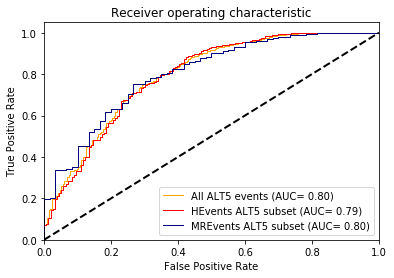

In [25]:
evaluate_AUC()

In [26]:
model.save('5_model.h5')